In [1]:
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
# from matplotlib import cmsweep
from matplotlib.ticker import LinearLocator
import matplotlib.pyplot as plt

from psPlotKit.data_plotter.fig_generator import figureGenerator

C:\Users\sss0031\AppData\Local\Temp\1\ipykernel_37316\3545757325.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
plt.rcParams["font.family"] = "Arial"
plt.rcParams["mathtext.fontset"] = "custom"
plt.rcParams['font.size'] = 18
plt.rcParams['font.weight'] = 'bold'
text_size_default = 18

In [3]:
data_seawater = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\prop_data\data_property_sea_reaktoro.csv')
data_bw = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\prop_data\data_property_bw_reaktoro.csv')
data_seawater_OP = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\prop_data\data_property_sea_reaktoro_osm_p.csv')
data_bw_OP = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\prop_data\data_property_bw_reaktoro_osm_p.csv')

In [4]:

data_sea = pd.concat([data_seawater, data_seawater_OP["Osmotic Pressure"]], axis=1)
data_bw = pd.concat([data_bw, data_bw_OP["Osmotic Pressure"]], axis=1)

In [5]:
# # find errors and create dataframe
# results_col = ["# Feed Mass Frac","Density","Enthalpy","Vapor Pressure","Osmotic Pressure"] 
# abs_dif = pd.DataFrame()

# for i in results_col:
#     abs_dif[i] = pd.DataFrame((abs(data_sea[i] - data_bw[i])/data_sea[i])*100)
    

In [6]:

# for i in results_col:
#     print(i)
#     print(np.max(abs_dif[i]))

In [7]:
sea_color = "#FFD046"
bw_color = "#4A7B9D"

title_size = 18

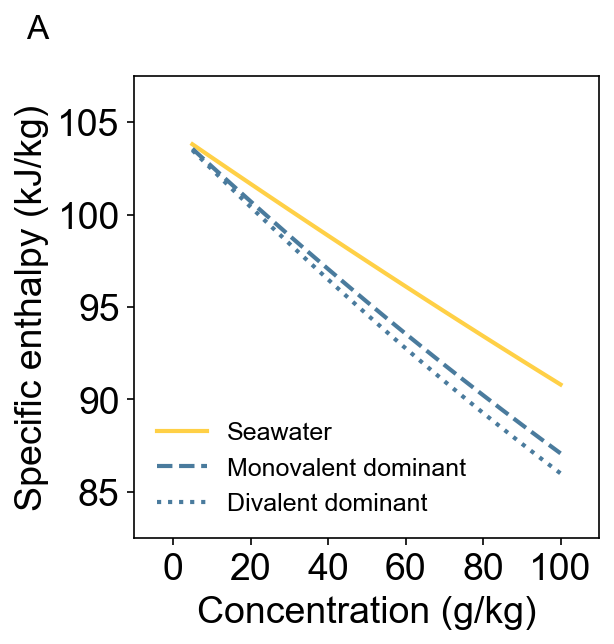

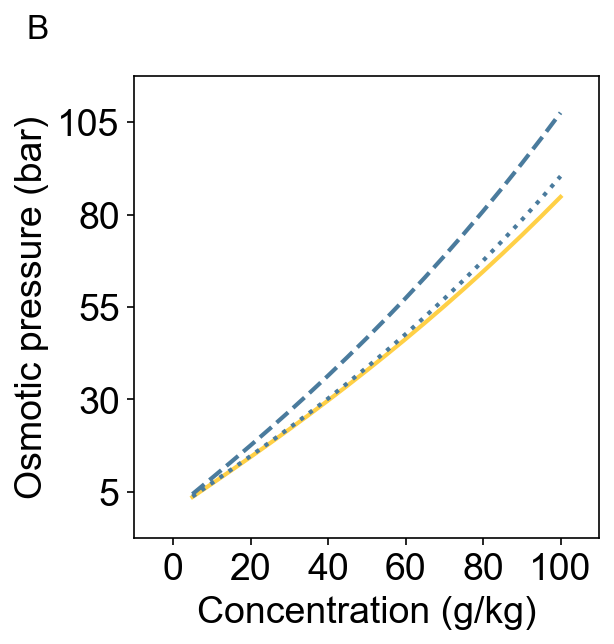

In [8]:
data_bw_2 = data_bw[(data_bw["Mono to Di Ratio"]==2)]
data_bw_25 = data_bw[(data_bw["Mono to Di Ratio"]==0.5)]

figure = figureGenerator()
figure.init_figure(        
    width=4,
    height=4,
    )
figure.set_default_figure_settings(font_size=text_size_default-2, label_size=text_size_default)
figure.plot_line(
    data_sea['# Feed Mass Frac']*1000, 
    -data_sea['Enthalpy']/1000,
    marker_overlay=None,
    label="",
    marker="",
    ls="-",
    lw=2,
    color=sea_color,
    ax_idx=0,
        )
figure.plot_line(
    data_bw_2['# Feed Mass Frac']*1000, 
    -data_bw_2['Enthalpy']/1000,
    marker_overlay=None,
    label="",
    marker="",
    ls="--",
    lw=2,
    color=bw_color,
    ax_idx=0,
)
figure.plot_line(
    data_bw_25['# Feed Mass Frac']*1000, 
    -data_bw_25['Enthalpy']/1000,
    marker_overlay=None,
    label="",
    marker="",
    ls=":",
    lw=2,
    color=bw_color,
    ax_idx=0,
)
spacing_factor = 2
yformat=[[85,105],5]
xformat=[[0,100],20]
ylim = yformat[0]
yinc = yformat[1]
xlim = xformat[0]
xinc = xformat[1]
plt.ylim(ylim[0]-yinc/spacing_factor, ylim[1]+yinc/spacing_factor)
plt.xlim(xlim[0]-xinc/spacing_factor, xlim[1]+xinc/spacing_factor)
plt.xlabel("Concentration (g/kg)",fontsize=text_size_default)
plt.ylabel("Specific enthalpy (kJ/kg)",fontsize=text_size_default)
plt.xticks([0, 20, 40, 60, 80, 100],fontsize=text_size_default)
plt.yticks(np.linspace(ylim[0], ylim[1], int(round((ylim[1]-ylim[0])/yinc))+1),fontsize=text_size_default)
plt.legend(["Seawater","Monovalent dominant","Divalent dominant"], loc="lower left", frameon=False,fontsize=text_size_default-6)
figure.add_text(-35, 110, "A")
figure.save_fig(name="mono_di_enth")

figure = figureGenerator()
figure.init_figure(        
    width=4,
    height=4,
    )
figure.set_default_figure_settings(font_size=text_size_default-2, label_size=text_size_default)
figure.plot_line(
    data_sea['# Feed Mass Frac']*1000, 
    data_sea['Osmotic Pressure']/1e5,
    marker_overlay=None,
    label="",
    marker="",
    ls="-",
    lw=2,
    color=sea_color,
        )
figure.plot_line(
    data_bw_2['# Feed Mass Frac']*1000, 
    data_bw_2['Osmotic Pressure']/1e5,
    marker_overlay=None,
    label="",
    marker="",
    ls="--",
    lw=2,
    color=bw_color,
)
figure.plot_line(
    data_bw_25['# Feed Mass Frac']*1000, 
    data_bw_25['Osmotic Pressure']/1e5,
    marker_overlay=None,
    label="",
    marker="",
    ls=":",
    lw=2,
    color=bw_color,
)
figure.add_text(-35, 130, "B")
spacing_factor = 2
yformat=[[5,105],25]
xformat=[[0,100],20]
ylim = yformat[0]
yinc = yformat[1]
xlim = xformat[0]
xinc = xformat[1]
plt.ylim(ylim[0]-yinc/spacing_factor, ylim[1]+yinc/spacing_factor)
plt.xlim(xlim[0]-xinc/spacing_factor, xlim[1]+xinc/spacing_factor)
plt.xlabel("Concentration (g/kg)",fontsize=text_size_default)
plt.ylabel("Osmotic pressure (bar)",fontsize=text_size_default)
plt.xticks([0, 20, 40, 60, 80, 100],fontsize=text_size_default)
plt.yticks(np.linspace(ylim[0], ylim[1], int(round((ylim[1]-ylim[0])/yinc))+1),fontsize=text_size_default)
figure.save_fig(name="mono_di_osm_p")


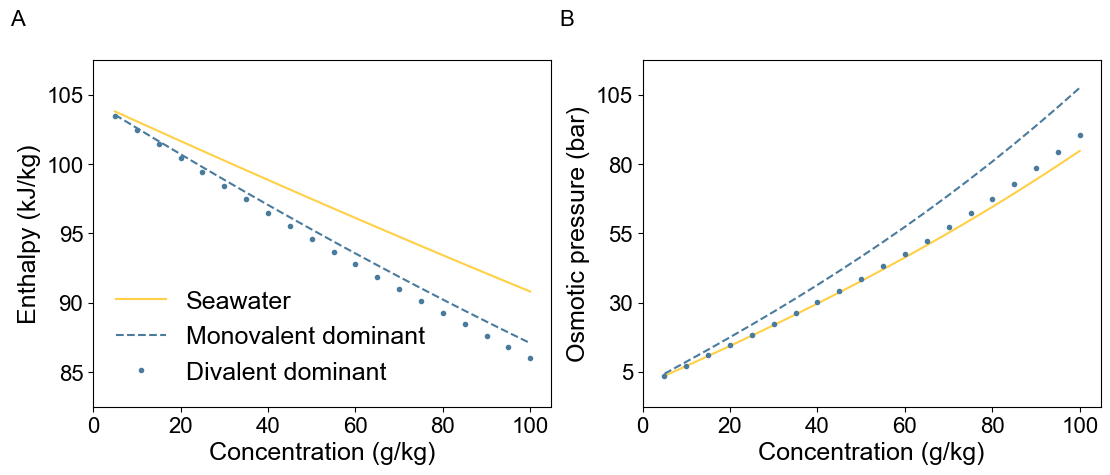

In [9]:
fig, axs = plt.subplots(ncols=2, nrows=1,figsize=(13,4.5),)
data_bw_2 = data_bw[(data_bw["Mono to Di Ratio"]==2)]
data_bw_25 = data_bw[(data_bw["Mono to Di Ratio"]==0.5)]

axs[0].text(-19, 110, "A")
axs[1].text(-19, 130, "B")
# axs[0].set_title("A", loc="left", pad=15)
# axs[1].set_title("B", loc="left", pad=15)

axs[0].plot(data_sea['# Feed Mass Frac']*1000, -data_sea['Enthalpy']/1000, color=sea_color)
axs[0].plot(data_bw_2['# Feed Mass Frac']*1000, -data_bw_2['Enthalpy']/1000, "--", color=bw_color)
axs[0].plot(data_bw_25['# Feed Mass Frac']*1000, -data_bw_25['Enthalpy']/1000, ".", color=bw_color)

axs[0].set_xlabel("Concentration (g/kg)", fontsize=title_size)
axs[0].set_ylabel("Enthalpy (kJ/kg)", fontsize=title_size)
axs[0].set_xticks([0, 20, 40, 60, 80, 100])
spacing_factor = 2
yformat=[[85,105],5]
ylim = yformat[0]
yinc = yformat[1]
axs[0].set_ylim(ylim[0]-yinc/spacing_factor, ylim[1]+yinc/spacing_factor)
axs[0].set_yticks(np.linspace(ylim[0], ylim[1], int(round((ylim[1]-ylim[0])/yinc))+1))
# axs[0].set_yticks([85,90,95,100,105])

axs[1].plot(data_sea['# Feed Mass Frac']*1000, data_sea['Osmotic Pressure']/1e5, color=sea_color)
axs[1].plot(data_bw_2['# Feed Mass Frac']*1000, data_bw_2['Osmotic Pressure']/1e5, "--", color=bw_color)
axs[1].plot(data_bw_25['# Feed Mass Frac']*1000, data_bw_25['Osmotic Pressure']/1e5, ".", color=bw_color)

axs[1].set_xlabel("Concentration (g/kg)", fontsize=title_size)
axs[1].set_ylabel("Osmotic pressure (bar)", fontsize=title_size)


axs[0].legend(["Seawater","Monovalent dominant","Divalent dominant"], loc="lower left", fontsize=title_size, frameon=False)
axs[1].set_xticks([0, 20, 40, 60, 80, 100])
spacing_factor = 2
yformat=[[5,105],25]
ylim = yformat[0]
yinc = yformat[1]
axs[1].set_ylim(ylim[0]-yinc/spacing_factor, ylim[1]+yinc/spacing_factor)
axs[1].set_yticks(np.linspace(ylim[0], ylim[1], int(round((ylim[1]-ylim[0])/yinc))+1))

axs[1].yaxis.set_tick_params(labelbottom=True)

fig.savefig("Mono_Di_Enth_Osm_P",bbox_inches="tight",dpi=600)

In [10]:
s1 = pd.read_csv(r"C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\MVC_Reaktoro_sensitivity_4.csv")
s2 = pd.read_csv(r"C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\MVC_Reaktoro_sensitivity_5.csv")
s3 = pd.read_csv(r"C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\MVC_Reaktoro_sensitivity_6.csv")

s4 = pd.read_csv(r"C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\MVC_Sea_sensitivity_1.csv")
s5 = pd.read_csv(r"C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\MVC_Sea_sensitivity_2.csv")
s6 = pd.read_csv(r"C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\MVC_Sea_sensitivity_3.csv")

s7 = pd.read_csv(r"C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\MVC_NaCl_sensitivity_1.csv")
s8 = pd.read_csv(r"C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\MVC_NaCl_sensitivity_2.csv")
s9 = pd.read_csv(r"C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\MVC_NaCl_sensitivity_3.csv")

In [11]:
color_list = [
                "#a6cee3",
                "#1f78b4",
                "#b2df8a",
                "#1d6918ff",
                "#fb9a99",
                "#e31a1c",
                "#fdbf6f",
                "#ff7f00",
                "#cab2d6",
                "#6a3d9a",
                "#ffff99",
                "#b15928",
            ]

light = '#a6cee3'
mid_light = "#1f78b4"
dark = "#11305f"

# light = '#8cc5e3'
# mid_light = '#3594cc'
# dark = "#14386D"

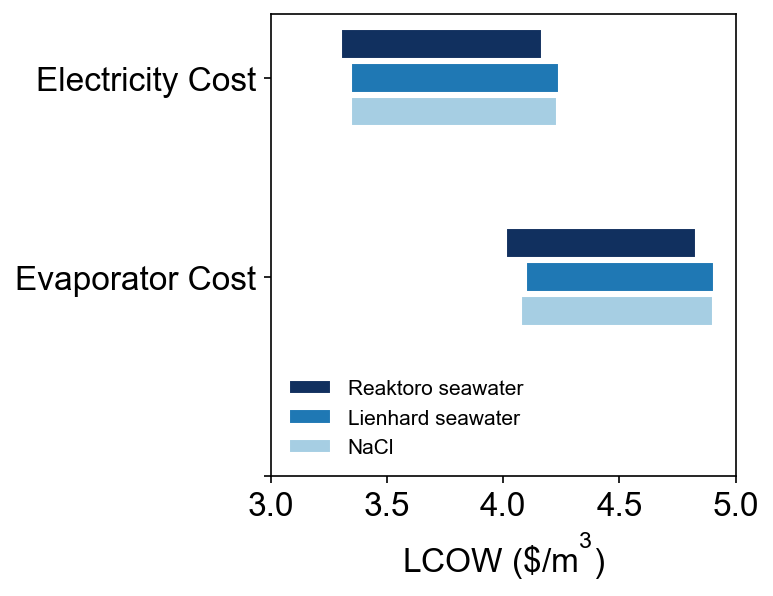

In [12]:
# Original parameter names and grouping labels
parameters = ["Electricity Cost","Evaporator Cost",""]
n_subbars = 3

# Sample data for LCOW_low and LCOW_high (the reordered values should match your data)
LCOW_low = [s1["LCOW"][0], s2["LCOW"][0], 
            s4["LCOW"][0], s5["LCOW"][0], 
            s7["LCOW"][0], s8["LCOW"][0], 
            ]

LCOW_high = [s1["LCOW"][1], s2["LCOW"][1],  
             s4["LCOW"][1], s5["LCOW"][1],  
            s7["LCOW"][1], s8["LCOW"][1],
             ]

# New ordered indices based on the new parameter order
indices_order = [0, 2, 4,
                 1, 3, 5,
                # 2, 5, 8
                 ]

# Reorder LCOW_low and LCOW_high based on the new indices
# parameters_new = [parameters[i] for i in indices_order]
LCOW_low = [LCOW_low[i] for i in indices_order]
LCOW_high = [LCOW_high[i] for i in indices_order]

base_y_pos = np.arange(len(parameters))
y_pos = []
offset = [-0.17, 0, 0.17 ]

for y in base_y_pos:
    for o in offset:
        y_pos.append(y + o)

fig = figureGenerator()
fig.init_figure(        
    width=4,
    height=4,
    )
fig.set_default_figure_settings(font_size=title_size, label_size=title_size)

color = [dark, mid_light, light,
         dark, mid_light, light,
         dark, mid_light, light,
]

# y_pos = np.arange(len(parameters))

width = []
bottom = []
for low, high in zip(LCOW_low, LCOW_high):
    width.append(abs(high - low))
    bottom.append(min(low, high))

# Loop over each parameter to plot individual bars with unique labels
for y, w, b, c in zip(y_pos, width, bottom, color):
    fig.plot_bar(
        [y],  # single y position
        [w],  # single width
        bottom=[b],  # single bottom position
        width=0.15,
        vertical=False,
        color=c,
        edgecolor="white",
    )


# Additional plot settings
plt.tick_params(labelsize=title_size-2)
plt.xlim(3,5)
plt.xlabel("LCOW ($\$$/m$^3$)",fontsize=title_size-2)
plt.legend(["Reaktoro seawater","Lienhard seawater","NaCl"], loc="lower left", fontsize=10, frameon=False)

plt.yticks(base_y_pos, parameters)
plt.gca().invert_yaxis()
plt.savefig("MVC_sensitivity", dpi=600, bbox_inches='tight')

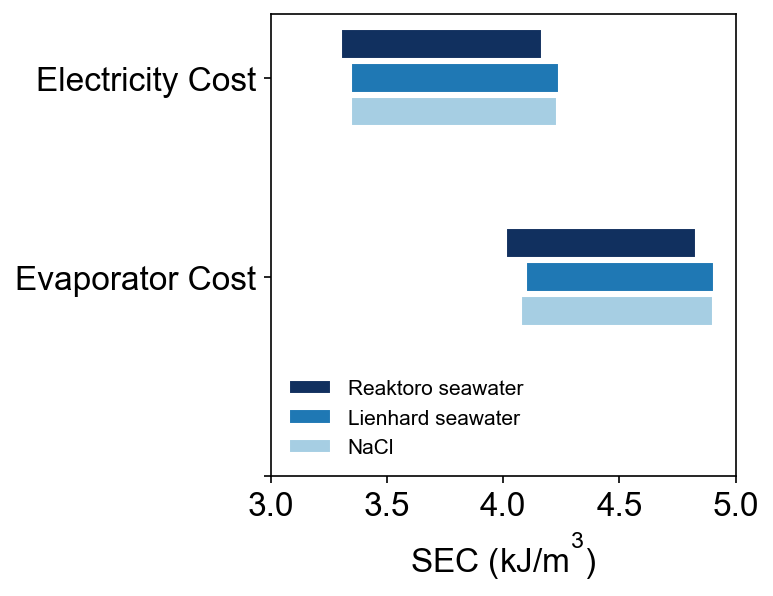

In [13]:
# Original parameter names and grouping labels
parameters = ["Electricity Cost","Evaporator Cost",""]
n_subbars = 3

# Sample data for LCOW_low and LCOW_high (the reordered values should match your data)
SEC_low = [
    s1["SEC"][0], s2["SEC"][0], 
    s4["SEC"][0], s5["SEC"][0], 
    s7["SEC"][0], s8["SEC"][0], 
            ]

SEC_high = [
    s1["SEC"][1], s2["SEC"][1],  
    s4["SEC"][1], s5["SEC"][1],  
    s7["SEC"][1], s8["SEC"][1],
             ]

# New ordered indices based on the new parameter order
indices_order = [0, 2, 4,
                 1, 3, 5,
                # 2, 5, 8
                 ]

# Reorder LCOW_low and LCOW_high based on the new indices
# parameters_new = [parameters[i] for i in indices_order]
SEC_low = [SEC_low[i] for i in indices_order]
SEC = [SEC_high[i] for i in indices_order]

fig = figureGenerator()
fig.init_figure(        
    width=4,
    height=4,
    )
fig.set_default_figure_settings(font_size=title_size, label_size=title_size)

color = [dark, mid_light, light,
         dark, mid_light, light,
         dark, mid_light, light,
]

# y_pos = np.arange(len(parameters))

width = []
bottom = []
for low, high in zip(LCOW_low, LCOW_high):
    width.append(abs(high - low))
    bottom.append(min(low, high))

# Loop over each parameter to plot individual bars with unique labels
for y, w, b, c in zip(y_pos, width, bottom, color):
    fig.plot_bar(
        [y],  # single y position
        [w],  # single width
        bottom=[b],  # single bottom position
        width=0.15,
        vertical=False,
        color=c,
        edgecolor="white",
    )


# Additional plot settings
plt.tick_params(labelsize=title_size-2)
plt.xlim(3,5)
plt.xlabel("SEC (kJ/m$^3$)", fontsize=title_size-2)
plt.legend(["Reaktoro seawater","Lienhard seawater","NaCl"], loc="lower left", fontsize=10, frameon=False)

plt.yticks(base_y_pos, parameters)
plt.gca().invert_yaxis()
plt.savefig("MVC_sensitivity_SEC", dpi=600, bbox_inches='tight')

In [14]:
s1 = pd.read_csv(r"C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\RO_Reaktoro_sensitivity_5.csv")
s2 = pd.read_csv(r"C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\RO_Reaktoro_sensitivity_6.csv")

s3 = pd.read_csv(r"C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\RO_Sea_sensitivity_1.csv")
s4 = pd.read_csv(r"C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\RO_Sea_sensitivity_2.csv")

s5 = pd.read_csv(r"C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\RO_NaCl_sensitivity_1.csv")
s6 = pd.read_csv(r"C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\RO_NaCl_sensitivity_2.csv")


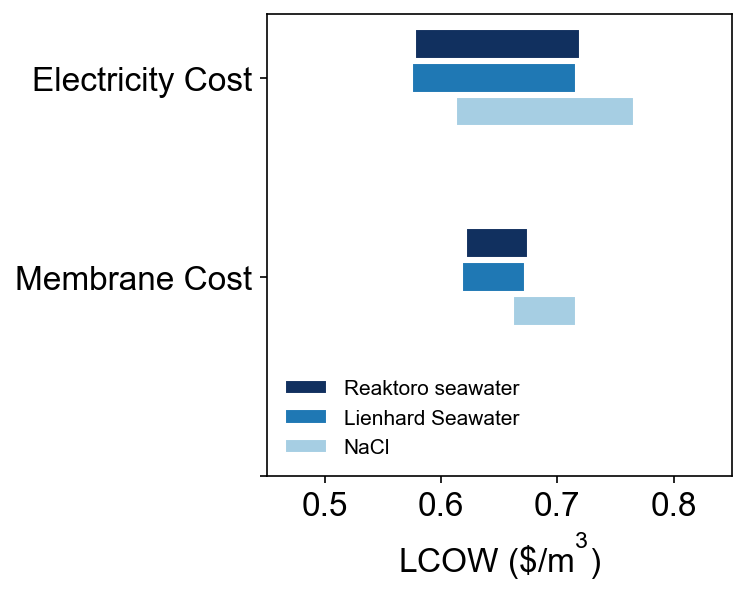

In [15]:
# Original parameter names and grouping labels
parameters = ["Electricity Cost","Membrane Cost",""]

# Sample data for LCOW_low and LCOW_high (the reordered values should match your data)
LCOW_low = [s1["LCOW"][0], s2["LCOW"][0], 
            s3["LCOW"][0], s4["LCOW"][0], 
            s5["LCOW"][0], s6["LCOW"][0],  
            ]

LCOW_high = [s1["LCOW"][1], s2["LCOW"][1], 
             s3["LCOW"][1], s4["LCOW"][1], 
             s5["LCOW"][1], s6["LCOW"][1], 
             ]

# New ordered indices based on the new parameter order
indices_order = [0, 2, 4, 
                 1, 3, 5,]

# Reorder LCOW_low and LCOW_high based on the new indices
# parameters_new = [parameters[i] for i in indices_order]
LCOW_low = [LCOW_low[i] for i in indices_order]
LCOW_high = [LCOW_high[i] for i in indices_order]

# base_y_pos = np.arange(len(parameters))
# y_pos = []
# offset = [-0.2, 0, 0.2]

# for y in base_y_pos:
#     for o in offset:
#         y_pos.append(y + o)


fig = figureGenerator()
fig.init_figure(        
    width=4,
    height=4,
    )
fig.set_default_figure_settings(font_size=text_size_default-2, label_size=text_size_default)

color = [dark, mid_light, light,
         dark, mid_light, light,

]

# y_pos = np.arange(len(parameters))

width = []
bottom = []
for low, high in zip(LCOW_low, LCOW_high):
    width.append(abs(high - low))
    bottom.append(min(low, high))

# Loop over each parameter to plot individual bars with unique labels
for y, w, b, c in zip(y_pos, width, bottom, color):
    fig.plot_bar(
        [y],  # single y position
        [w],  # single width
        bottom=[b],  # single bottom position
        width=0.15,
        vertical=False,
        color=c,
        edgecolor="white",
    )

# Additional plot settings
plt.tick_params(labelsize=title_size-2)
plt.xlim(0.45,0.85)
plt.xlabel("LCOW ($\$$/m$^3$)", fontsize=title_size-2)
plt.legend(["Reaktoro seawater","Lienhard Seawater","NaCl"], loc='lower left', fontsize=10, frameon=False)

plt.yticks(base_y_pos, parameters)
plt.gca().invert_yaxis()

plt.savefig("RO_sensitivity", dpi=600, bbox_inches='tight')

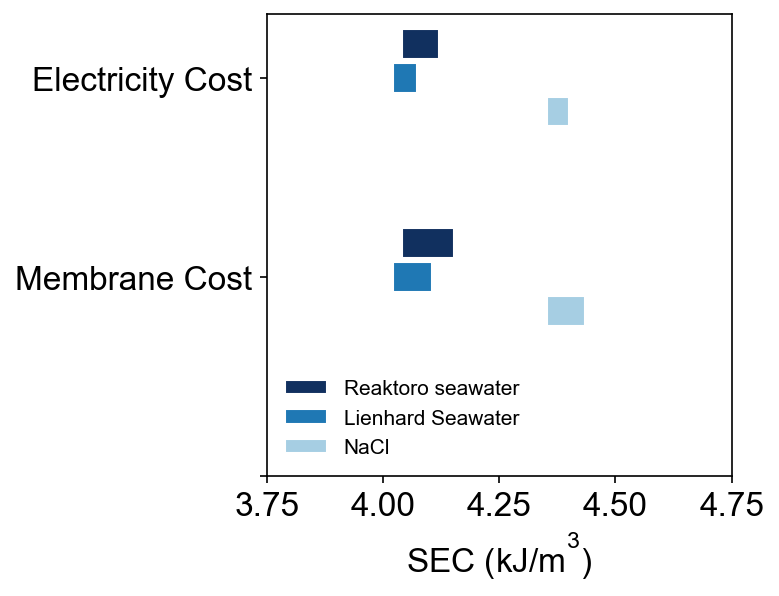

In [16]:
parameters = ["Electricity Cost","Membrane Cost",""]

# Sample data for LCOW_low and LCOW_high (the reordered values should match your data)
SEC_low = [s1["SEC"][0], s2["SEC"][0], 
            s3["SEC"][0], s4["SEC"][0], 
            s5["SEC"][0], s6["SEC"][0],  
            ]

SEC_high = [s1["SEC"][1], s2["SEC"][1], 
             s3["SEC"][1], s4["SEC"][1], 
             s5["SEC"][1], s6["SEC"][1], 
             ]

# New ordered indices based on the new parameter order
indices_order = [0, 2, 4, 
                 1, 3, 5,]

# Reorder LCOW_low and LCOW_high based on the new indices
# parameters_new = [parameters[i] for i in indices_order]
SEC_low = [SEC_low[i] for i in indices_order]
SEC_high = [SEC_high[i] for i in indices_order]

# base_y_pos = np.arange(len(parameters))
# y_pos = []
# offset = [-0.2, 0, 0.2]

# for y in base_y_pos:
#     for o in offset:
#         y_pos.append(y + o)


fig = figureGenerator()
fig.init_figure(        
    width=4,
    height=4,
    )
fig.set_default_figure_settings(font_size=text_size_default-2, label_size=text_size_default)

color = [dark, mid_light, light,
         dark, mid_light, light,

]

# y_pos = np.arange(len(parameters))

width = []
bottom = []
for low, high in zip(SEC_low, SEC_high):
    width.append(abs(high - low))
    bottom.append(min(low, high))

# Loop over each parameter to plot individual bars with unique labels
for y, w, b, c in zip(y_pos, width, bottom, color):
    fig.plot_bar(
        [y],  # single y position
        [w],  # single width
        bottom=[b],  # single bottom position
        width=0.15,
        vertical=False,
        color=c,
        edgecolor="white",
    )

# Additional plot settings
plt.tick_params(labelsize=title_size-2)
plt.xlim(3.75,4.75)
plt.xlabel("SEC (kJ/m$^3$)", fontsize=title_size-2)
plt.legend(["Reaktoro seawater","Lienhard Seawater","NaCl"], loc='lower left', fontsize=10, frameon=False)

plt.yticks(base_y_pos, parameters)
plt.gca().invert_yaxis()

plt.savefig("RO_sensitivity_SEC", dpi=600, bbox_inches='tight')